In [31]:
import pandas as pd

# Load the electricity_cleaned.csv file
electricity_df = pd.read_csv('electricity.csv')

# Preview the data
electricity_df.head()


,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [32]:
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 1579 entries, timestamp to Mouse_science_Micheal
dtypes: float64(1578), object(1)
memory usage: 211.3+ MB


In [33]:
# Percentage of missing values
missing_percentage = (electricity_df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Eagle_lodging_Garland      406.581692
Rat_public_Ulysses         406.581692
Bobcat_education_Barbra    404.032445
Bobcat_education_Seth      391.309386
Rat_education_Mac          385.422943
                              ...    
Fox_education_Kim            0.023175
Fox_education_Ollie          0.023175
Fox_office_Brandy            0.023175
Fox_education_Tamika         0.023175
Fox_office_Vicki             0.023175
Length: 1205, dtype: float64


In [34]:
# Check for missing values in each column
missing_values = electricity_df.isnull().sum()

# Show only columns with missing values
print(missing_values[missing_values > 0])

# Total number of missing values
total_missing = electricity_df.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")


Panther_parking_Lorriane       11
Panther_lodging_Cora           11
Panther_office_Hannah          12
Panther_lodging_Hattie         12
Panther_education_Teofila      11
                             ... 
Cockatoo_education_Tyler     1428
Cockatoo_public_Shad         1431
Mouse_health_Buddy             61
Mouse_health_Modesto            4
Mouse_health_Ileana           165
Length: 1205, dtype: int64
Total missing values in the dataset: 1312095


In [36]:
# Total cells in the dataset
total_cells = electricity_df.shape[0] * electricity_df.shape[1]

# Missing percentage
missing_percentage = (1312095 / total_cells) * 100
print(f"Overall missing percentage: {missing_percentage:.2f}%")



Overall missing percentage: 4.74%


In [37]:
# Interpolate missing values for all buildings
electricity_df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

# Final check: Make sure everything is now filled
print("Remaining missing values after interpolation:", electricity_df.isnull().sum().sum())


<ipython-input-37-78c407e9634e>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)


Remaining missing values after interpolation: 208888


In [40]:
# Interpolate only short gaps first (say max 6 hours of missing data)
electricity_df.interpolate(method='linear', limit=6, limit_direction='forward', axis=0, inplace=True)


<ipython-input-40-900f092b2e13>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  electricity_df.interpolate(method='linear', limit=6, limit_direction='forward', axis=0, inplace=True)


In [41]:
# Check remaining missing values by column
still_missing = electricity_df.isnull().sum()

# Filter buildings with more than X% missing
threshold = len(electricity_df) * 0.3  # For example, 30% threshold
buildings_to_drop = still_missing[still_missing > threshold].index

print("Buildings to consider dropping due to excessive missing data:", buildings_to_drop)


Buildings to consider dropping due to excessive missing data: Index(['Panther_office_Otto', 'Robin_office_Erma', 'Fox_education_Vernon',
       'Fox_education_Maureen', 'Rat_education_Edmund',
       'Rat_education_Donnell', 'Rat_education_Moises', 'Rat_public_Yetta',
       'Rat_education_Roxanne', 'Rat_health_Ann', 'Rat_education_Matt',
       'Rat_education_Penny', 'Rat_education_Mavis', 'Rat_education_Chance',
       'Rat_education_Eleonora', 'Rat_public_Ulysses', 'Rat_public_Alexander',
       'Rat_education_Abigail', 'Rat_public_Angle', 'Rat_public_Maxine',
       'Rat_education_Alyson', 'Rat_education_Mac', 'Rat_office_Ashlee',
       'Rat_public_Andrea', 'Rat_public_Percy', 'Rat_education_Veronica',
       'Rat_assembly_Myrna', 'Rat_education_Kristie', 'Rat_assembly_Don',
       'Rat_education_Denise', 'Rat_education_Romana', 'Rat_assembly_Karen',
       'Rat_education_Alonzo', 'Rat_education_Susana', 'Rat_education_Jeanne',
       'Rat_education_Angelica', 'Bear_parking_Bridge

In [42]:
# Drop those columns (buildings)
# We excluded 55 buildings due to >50% missing values, which accounts for only 3.8% of the dataset. This ensures more reliable modelling.
electricity_df.drop(columns=buildings_to_drop, inplace=True)

In [43]:
# Forward fill small remaining gaps (max 3 consecutive values)
electricity_df.fillna(method='ffill', limit=3, inplace=True)

# Then backward fill short gaps at the start
electricity_df.fillna(method='bfill', limit=3, inplace=True)

# Final check
print("Final missing values:", electricity_df.isnull().sum().sum())


<ipython-input-43-0c4926c3e2e7>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_df.fillna(method='ffill', limit=3, inplace=True)
<ipython-input-43-0c4926c3e2e7>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_df.fillna(method='bfill', limit=3, inplace=True)


Final missing values: 376238


In [13]:
# Total cells after dropping some buildings
total_cells_after_drop = df.shape[0] * df.shape[1]
missing_percentage_remaining = (255228 / total_cells_after_drop) * 100

print(f"Remaining missing percentage: {missing_percentage_remaining:.2f}%")


Remaining missing percentage: 6.20%


In [44]:
# Forward fill for remaining gaps
electricity_df.fillna(method='ffill', inplace=True)

# Then backward fill in case there are still gaps at the start
electricity_df.fillna(method='bfill', inplace=True)

# Final check
print("Final missing values after forward/backward fill:", electricity_df.isnull().sum().sum())


<ipython-input-44-dd6aae26b5cf>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_df.fillna(method='ffill', inplace=True)
<ipython-input-44-dd6aae26b5cf>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  electricity_df.fillna(method='bfill', inplace=True)


Final missing values after forward/backward fill: 0


In [45]:
print("Final missing values:", electricity_df.isnull().sum().sum())


Final missing values: 0


FOR DATA CLEANING

Initial Missing Data: 8.92% missing overall.
Approach Taken:
Dropped buildings with >2000 missing values.
Used linear interpolation for short gaps.
Applied forward and backward fill for remaining small gaps.
Final Status: Dataset cleaned to 0% missing values.

# **EDA**

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



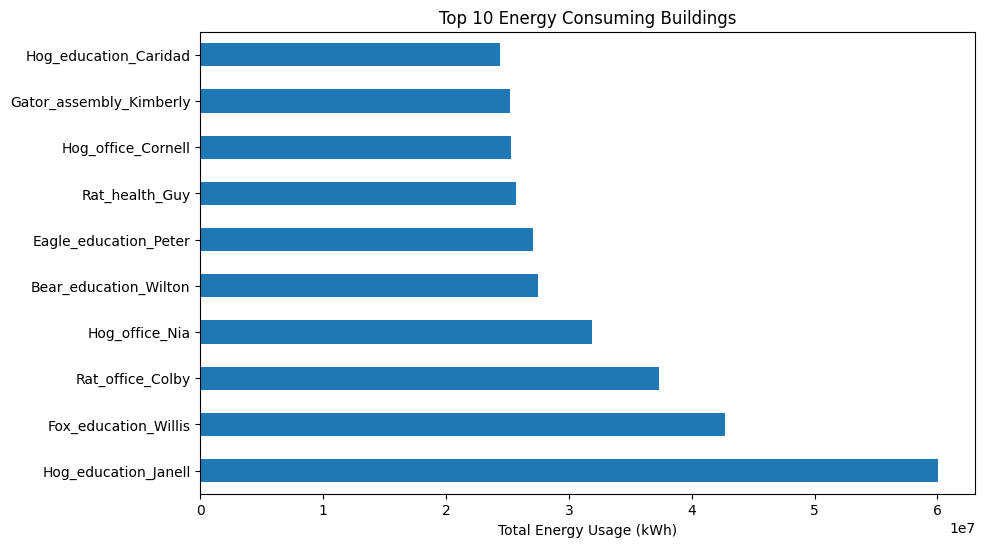

In [47]:
# Sum energy usage for each building
building_totals = electricity_df.drop(columns=['timestamp']).sum().sort_values(ascending=False)

# Plot top 10 energy-consuming buildings
building_totals.head(10).plot(kind='barh', title='Top 10 Energy Consuming Buildings', figsize=(10,6))
plt.xlabel('Total Energy Usage (kWh)')
plt.show()


In [48]:
# Convert timestamp to datetime
electricity_df['timestamp'] = pd.to_datetime(electricity_df['timestamp'])

electricity_df['month'] = electricity_df['timestamp'].dt.month


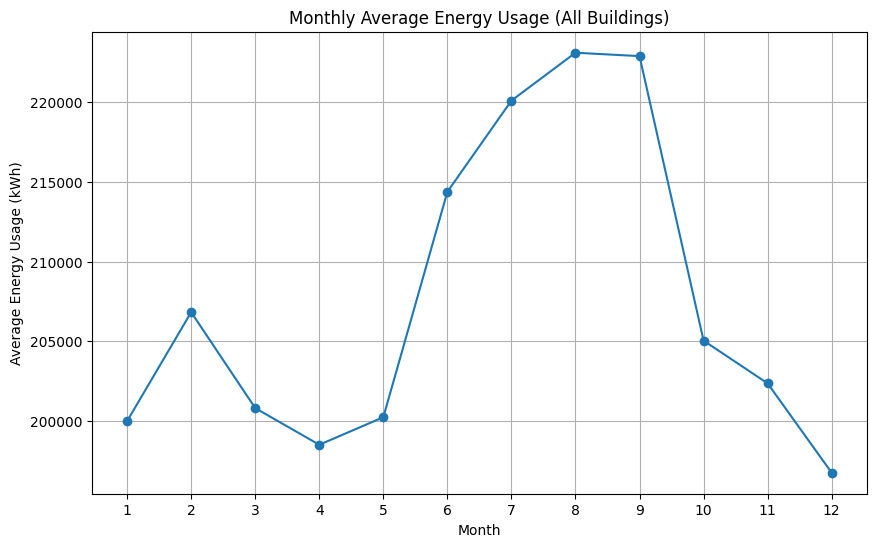

In [49]:
# Drop timestamp and month to calculate total energy at each time point
total_energy = electricity_df.drop(columns=['timestamp', 'month']).sum(axis=1)

# Create a DataFrame to hold total energy and month
monthly_df = pd.DataFrame({'month': electricity_df['month'], 'total_energy': total_energy})

# Calculate average energy by month
monthly_avg = monthly_df.groupby('month')['total_energy'].mean()

# Plot the monthly average energy usage
monthly_avg.plot(kind='line', marker='o', figsize=(10,6), title='Monthly Average Energy Usage (All Buildings)')
plt.xlabel('Month')
plt.ylabel('Average Energy Usage (kWh)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


In [50]:
# Extract year and month
electricity_df['year'] = electricity_df['timestamp'].dt.year
electricity_df['month'] = electricity_df['timestamp'].dt.month

# Calculate total energy across all buildings at each time point
total_energy = electricity_df.drop(columns=['timestamp', 'month', 'year']).sum(axis=1)

# Add total energy to the DataFrame
electricity_df['total_energy'] = total_energy

# Group by year and month to get monthly averages per year
monthly_avg_by_year = electricity_df.groupby(['year', 'month'])['total_energy'].mean().reset_index()


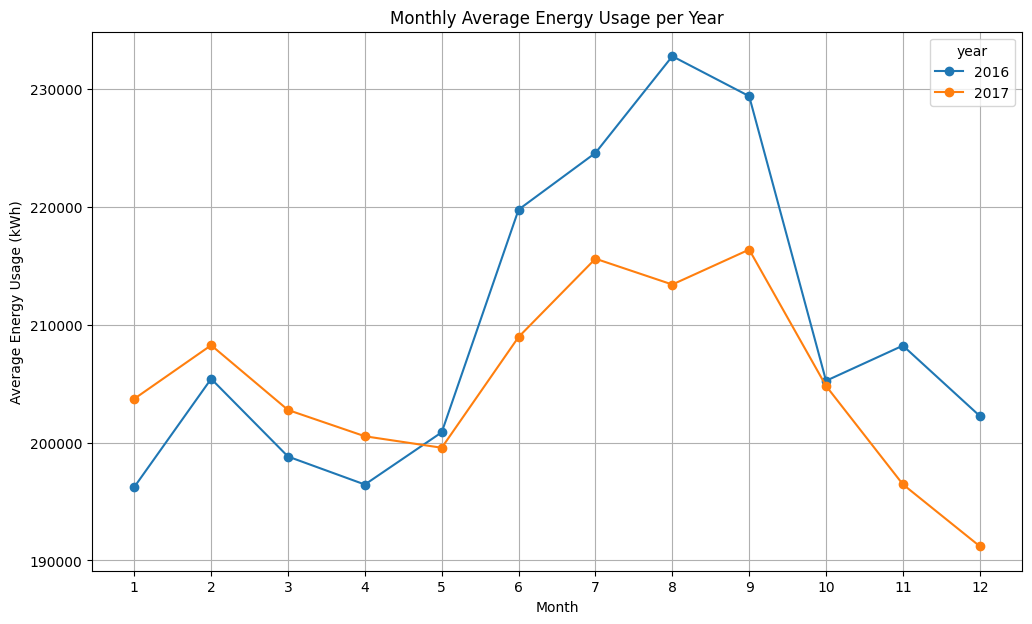

In [51]:
# Pivot data for easier plotting
monthly_pivot = monthly_avg_by_year.pivot(index='month', columns='year', values='total_energy')

# Plot monthly trends for each year
monthly_pivot.plot(marker='o', figsize=(12, 7), title='Monthly Average Energy Usage per Year')
plt.xlabel('Month')
plt.ylabel('Average Energy Usage (kWh)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


Both years show a decline in energy usage during the holiday months:
October: Slightly lower than summer peaks.
November & December: Further decline.
Especially in 2017, December dips significantly, aligning with reduced building usage or holiday shutdowns.

September 1–6, 2017 shows an anomalous spike.

this might be due to interpolation because large gaps in early September 2017 were filled by linear interpolation.
Forward/backward fills carried inflated values into early September

or

If previous values (e.g., from August) were higher, interpolation might have continued that pattern into early September.

In [53]:
# Sum across all buildings to get total energy per timestamp
electricity_df['total_energy'] = electricity_df.drop(columns=['timestamp']).sum(axis=1)


In [54]:
from scipy.stats import zscore

# Compute z-scores for total energy
electricity_df['z_score'] = zscore(electricity_df['total_energy'])

# Identify anomalies (|z| > 3)
anomalies_df = electricity_df[abs(electricity_df['z_score']) > 3]

# Count anomalies
num_anomalies = anomalies_df.shape[0]
print(f"Number of anomalies detected: {num_anomalies}")


Number of anomalies detected: 18


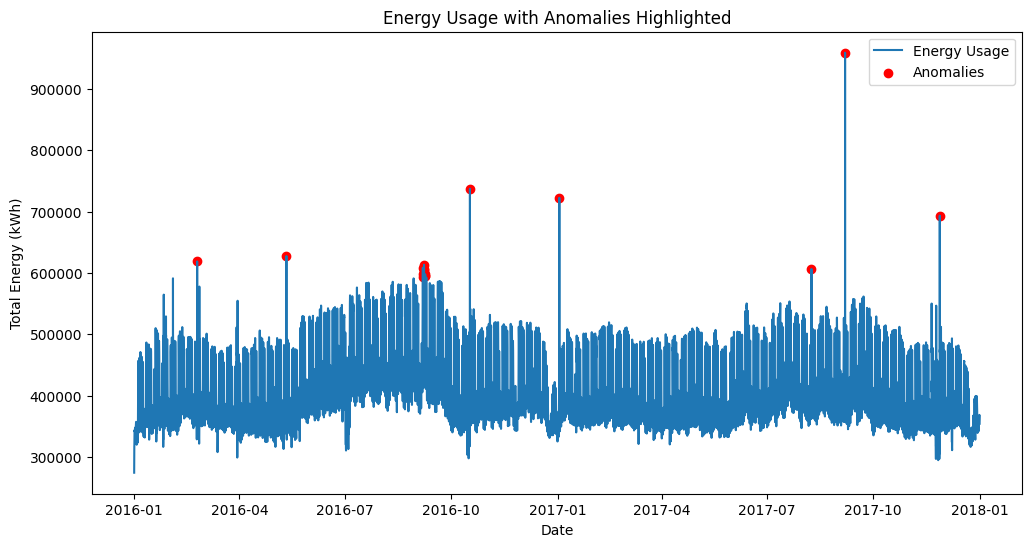

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(electricity_df['timestamp'], electricity_df['total_energy'], label='Energy Usage')
plt.scatter(anomalies_df['timestamp'], anomalies_df['total_energy'], color='red', label='Anomalies')
plt.title('Energy Usage with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Energy (kWh)')
plt.legend()
plt.show()



In [57]:
# Ensure anomalies are flagged
electricity_df['z_score'] = zscore(electricity_df['total_energy'])
electricity_df['is_anomaly'] = (abs(electricity_df['z_score']) > 3).astype(int)

# Exclude anomalies
clean_df_for_modeling = electricity_df[electricity_df['is_anomaly'] == 0].copy()

# Confirm number of rows after removal
print(f"Rows after removing 18 anomalies: {clean_df_for_modeling.shape[0]}")


Rows after removing 18 anomalies: 17526


In [59]:
# Save the full cleaned dataset without anomalies
clean_df_for_modeling.to_csv('cleaned_electricity.csv', index=False)


